# E04 Analog signals

This weeks homework asks you to perform a fast Fourier transform (FFT) on a given signal. The aim is to find out which frequency components are contained in the noisy but stationary signal. 

The signal is stored in an numpy array saved in the file `analag-signal1.npy`. The array contains two rows, the first row is the time axis and the second row is the signal. You first need to download the file `analag-signal1.npy` from the moodle or the github repository. 

Next you are asked to perform the discrete fast Fourier transform (numpy function `numpy.fft.fft`) on the signal and determine which frequencies are contained in the signal. Note that the signal is stationary, in other words, the frequency content does not change over time and you can use the entire signal to compute the FFT.

Adapt the 'Fast Fourier transform of a constructed signal' code from the in-class tutorial in order to do implement this exercise.

Here are the specific questions.

1. What is the sampling rate of the signal? In other words, at which frequency was the signal acquired? (Note that you first need to load the array from the `analag-signal1.npy` file by using the numpy `np.load()` function). 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.load('analog-signal1.npy')

dt = np.diff(data[0])
print(dt)
print('The sampling rate of the signal is : ',1/dt[0],' Hz')

[0.0005 0.0005 0.0005 ... 0.0005 0.0005 0.0005]
The sampling rate of the signal is :  2000.0  Hz


2. Perform the fast Fourier transform (FFT, with numpy function `numpy.fft.fft` as in the first example of the in-class tutorial) on the signal. Plot the signal in the time (time on x-axis, measurement on y-axis) and in the frequency domain (frequency on x-axis, spetral power on y-axis). Determine from the frequency domain plot  which frequencies are contained in the signal (determine the frequencies through visual inspection of the plot). Note that you need the sampling rate obtained above to get the correct scaling of the frequency axis. 

/home/mgraupe/.virtualenvs/locorungs/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


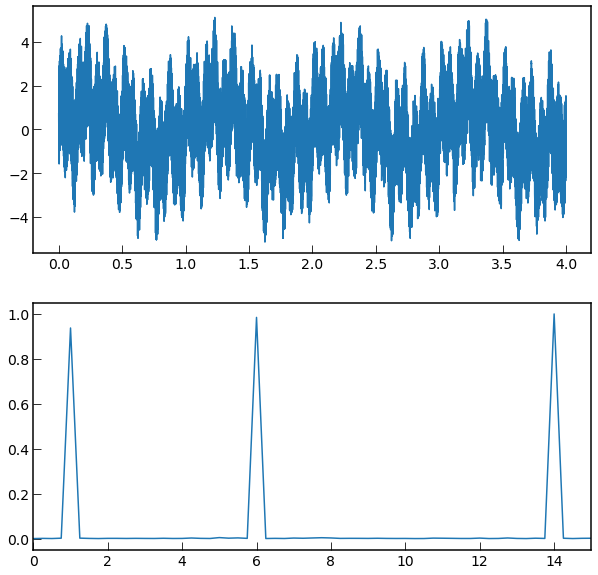

In [11]:
# performing FFT on signal ######################
fs = 1./dt[0]
nyquist = fs/2.                                  
fSpaceSignal = np.fft.fft(data[1])               
fBase = np.linspace(0,nyquist,np.floor(len(data[1])/2)+1) 
halfTheSignal = fSpaceSignal[:len(fBase)]        
complexConjugate = np.conj(halfTheSignal)        
powe = halfTheSignal*complexConjugate            

# plotting results ##############################
fig = plt.figure(figsize=(10,10))                
ax0 = fig.add_subplot(2,1,1)                    
ax0.plot(data[0],data[1])                                 

  
ax2 = fig.add_subplot(2,1,2)                     

ax2.plot(fBase,powe/max(powe))                   
ax2.set_xlim([0,15])                             
 
plt.show()                                      




The signal contains oscillations at the following frequencies : **1, 6 and 14 Hz**. 